In [1]:
#匯入模組及下載資料
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [2]:
#讀取cifar資料
(x_img_train,y_label_train),(x_img_test,y_label_test) = cifar10.load_data()

170500096/170498071 [==============================] - 85s 0us/step


In [4]:
#查看traindata和test資料筆數
print('train:',len(x_img_train))
print('test:',len(x_img_test))

train: 50000
test: 10000


In [5]:
#查看img_shape
x_img_train.shape
#(筆數，影像大小，顏色)

(50000, 32, 32, 3)

In [6]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [7]:
#查看y_label_train的shape
y_label_train.shape

(50000, 1)

In [8]:
#定義字典
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [17]:
import matplotlib.pyplot as plt
def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title = str(i)+"," + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += ",predict=" + label_dict[prediction[i]]
        
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

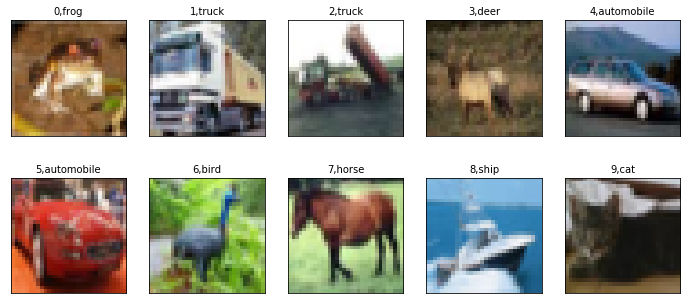

In [18]:
#看前10筆資料
plot_image_labels_prediction(x_img_train,y_label_train,[],0)

In [19]:
#資料預處理
#標準化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [20]:
#label ont-hot encoding
from keras.utils import np_utils
y_label_train_onehot = np_utils.to_categorical(y_label_train)
y_label_test_onehot = np_utils.to_categorical(y_label_test)

In [21]:
#建立模型
#提取影像特徵(卷積層、池化層)
#類神經網路(平坦層、隱藏層、輸出層)

#keras Sequential模組
from keras.models import Sequential
#keras layers模組
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [22]:
#建立線性堆疊模型
model = Sequential()

In [24]:
#建立卷積層1與池化層1並加入Dropout避免overfitting
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32,32,3),
                 activation='relu',
                 padding='same'))

In [25]:
model.add(Dropout(rate=0.25))

In [26]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
#建立卷積層2與池化層2並加入Dropout避免overfitting
model.add(Conv2D(filters=64,kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

In [28]:
model.add(Dropout(0.25))

In [29]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [30]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [31]:
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

In [32]:
model.add(Dense(10,activation='softmax'))

In [33]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [34]:
#透過反向傳播法，訓練模型
model.compile(loss ='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
#開始訓練
train_history = model.fit(x_img_train_normalize,y_label_train_onehot,
                         validation_split=0.2,
                         epochs=10,batch_size=128,verbose=2)

Epoch 1/10
313/313 - 65s - accuracy: 0.4078 - val_accuracy: 0.5304 - loss: 1.6403 - val_loss: 1.4015
Epoch 2/10
313/313 - 64s - accuracy: 0.5547 - val_accuracy: 0.5856 - loss: 1.2529 - val_loss: 1.2380
Epoch 3/10
313/313 - 64s - accuracy: 0.6145 - val_accuracy: 0.6394 - loss: 1.0867 - val_loss: 1.1024
Epoch 4/10
313/313 - 63s - accuracy: 0.6611 - val_accuracy: 0.6803 - loss: 0.9618 - val_loss: 0.9858
Epoch 5/10
313/313 - 62s - accuracy: 0.6972 - val_accuracy: 0.6861 - loss: 0.8653 - val_loss: 0.9571
Epoch 6/10
313/313 - 63s - accuracy: 0.7247 - val_accuracy: 0.7075 - loss: 0.7824 - val_loss: 0.8877
Epoch 7/10
313/313 - 63s - accuracy: 0.7512 - val_accuracy: 0.7156 - loss: 0.7057 - val_loss: 0.8476
Epoch 8/10
313/313 - 63s - accuracy: 0.7807 - val_accuracy: 0.7252 - loss: 0.6212 - val_loss: 0.8347
Epoch 9/10
313/313 - 73s - accuracy: 0.8045 - val_accuracy: 0.7248 - loss: 0.5503 - val_loss: 0.8248
Epoch 10/10
313/313 - 80s - accuracy: 0.8296 - val_accuracy: 0.7311 - loss: 0.4881 - val_lo

In [37]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

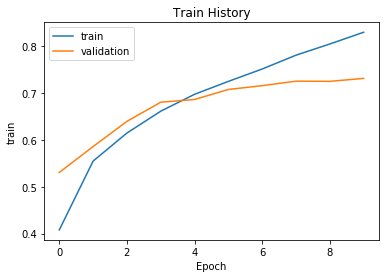

In [38]:
show_train_history(train_history,'accuracy','val_accuracy')

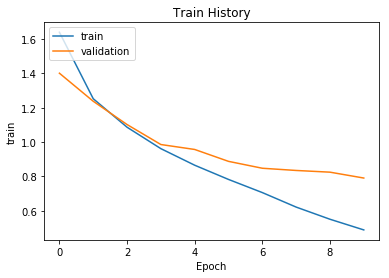

In [39]:
show_train_history(train_history,'loss','val_loss')